In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [5]:
from __future__ import print_function
from numpy import *
from scipy import *
import netCDF4 as nc
import numpy as np
import scipy as sp
import seawater
import datetime as dt

""
from salishsea_tools import (
    nc_tools,
    viz_tools, 
    geo_tools,
    tidetools
)
import matplotlib.pyplot as plt
#matplotlib.use('Agg')
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
sys.path.append('/data/tjarniko/MEOPAR/tools/SalishSeaTools/salishsea_tools/')
import mocsy
import river_201702 as rv
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
import datetime as dt

%matplotlib inline

In [16]:
def make_nclen(start,end,ftype, sdir):
    date_ar = []
    sens_ar = []
    doy_ar = []
    start_run = arrow.get(start)
    end_run = arrow.get(end)
    arrow_array = []
    for r in arrow.Arrow.span_range('day', start_run, end_run):
        arrow_array.append(r)

    dayslen = len(arrow_array)
    for i in range(0,dayslen):
        tdate = arrow_array[i][0]
        ddmmmyy = tdate.format('DDMMMYY').lower()
        ymd = tdate.format('YYYYMMDD')
        dddd = tdate.format('DDDD')
        nc_sens = sdir + '/SKOG_1d_*'+ ftype +'*' + ymd + '-' + ymd + '.nc'
        tnc_sens = glob.glob(nc_sens)
        sens_ar.append(tnc_sens[0])
        date_ar.append(ddmmmyy)
        doy_ar.append(dddd)
    return date_ar, sens_ar, doy_ar

In [17]:
start = '2015-01-01'
end = '2015-12-31'

st = dt.datetime(2015,1,1)
en = dt.datetime(2015,12,31)

y_st = st.timetuple().tm_yday
print(y_st)
y_en = en.timetuple().tm_yday
print(y_en)
ts_BR = np.arange(y_st,y_en+1,1)

sdir_preind = '/data/tjarniko/results/PREIND_1st_2015/ncs/'
sdir_br = '/data/tjarniko/results/BR_1st_2015/ncs/'

dates_preind, files_preind, doy_preind = make_nclen(start,end,'carp', sdir_preind)
dates_br, files_br, doy_br = make_nclen(start,end,'carp', sdir_br)


1
365


In [18]:
print(doy_br)

['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078', '079', '080', '081', '082', '083', '084', '085', '086', '087', '088', '089', '090', '091', '092', '093', '094', '095', '096', '097', '098', '099', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143'

In [10]:
pi_1 = nc.Dataset(files_preind[0])
br_1 = nc.Dataset(files_br[0])

br_1_co2 = br_1['co2_flux_mmol_m2_s'][0,:,:]
pi_1_co2 = pi_1['co2_flux_mmol_m2_s'][0,:,:]
diff_co2 = br_1['co2_flux_mmol_m2_s'][0,:,:] -pi_1['co2_flux_mmol_m2_s'][0,:,:]


'/data/tjarniko/results/PREIND_1st_2015/ncs/SKOG_1d_20150101_20150130_carp_T_20150101-20150101.nc'

0
10
20
30
40
50
60
70
80
90
100
110
120


KeyboardInterrupt: 

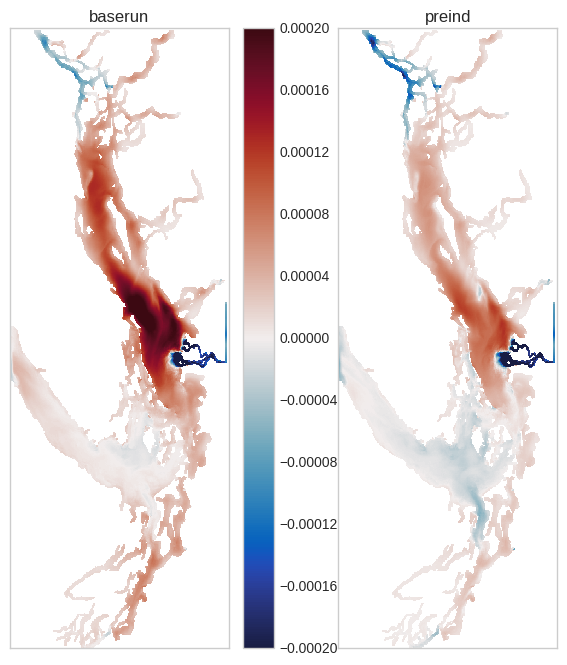

In [24]:
for i in range(0,len(doy_br)):
    if i % 10 == 0:
        print(i)
    pi_1 = nc.Dataset(files_preind[i])
    br_1 = nc.Dataset(files_br[i])
    doy = doy_br[i]
    tdate = dates_br[i]

    br_1_co2 = br_1['co2_flux_mmol_m2_s'][0,:,:]
    pi_1_co2 = pi_1['co2_flux_mmol_m2_s'][0,:,:]
    diff_co2 = br_1['co2_flux_mmol_m2_s'][0,:,:] -pi_1['co2_flux_mmol_m2_s'][0,:,:]


    t_cmap = cm.cm.balance
    t_vmin = -0.0002
    t_vmax = 0.0002
    fig = plt.figure(figsize=(12,8))

    ax = fig.add_subplot(1,3,1)
    tplt = np.ma.masked_values(br_1_co2,0)
    mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title('baserun')
    cbar = fig.colorbar(mesh, ax=ax)

    ax = fig.add_subplot(1,3,2)
    tplt = np.ma.masked_values(pi_1_co2,0)
    mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title('preind')
    cbar = fig.colorbar(mesh, ax=ax)

    ax = fig.add_subplot(1,3,3)
    tplt = np.ma.masked_values(br_1_co2-pi_1_co2,0)
    mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=t_vmin, vmax=t_vmax)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title('br-preind')
    cbar = fig.colorbar(mesh, ax=ax)
    fig.suptitle(tdate + ' flux differences, DOY '+ doy, fontsize = 30)
    fname = './FLUXDIFF' + tdate + '_' doy +'.png'

    fig.savefig(fname)
    plt.close()
    

In [ ]:
def range_analyzer(start,end, surfmap = True):
    
    """Wrapper for CCCma plotting code
    TJSJ, MOAD group, UBC, February 2019
    
    Input keywords:
      start,end, prof = True, ncb = True, surfmap = True, \
      buffmap = True, plume = True, pspace = True, pH_T = True):
    
    Uses arrow to give start, end dates and call CCCma_pipe, 
    which calls individual plotting codes depending on user input
        
    Option to make 6 plots: 
        1) prof: depth profiles of rel. conc. 
        2) surfmap: surface concentration map
        3) buffmap: map of buffer factors (doesn't work right now)
        4) plume: surface concentration in the plume region
        5) pspace: set of 4 parameterspace plots
        6) pH_T: threshold plots for pH, OmA, pCO2

    Option to make a netcdf file of relevant quantities and their std deviations:
        1) ncb: (short for netcdf builder) 
    
    Usage: 
    
    start = '2017-05-01'
    end = '2017-09-01'

    CCCma.range_analyzer(start,end, prof = True, ncb = True, surfmap = True, \
                   buffmap = True, plume = True, pspace = True, pH_T = True)

    """

    start_run = arrow.get(start)
    end_run = arrow.get(end)
    arrow_array = []
    for r in arrow.Arrow.span_range('day', start_run, end_run):
        arrow_array.append(r)

    for i in range(0,len(arrow_array)):
        r = arrow_array[i][0]
        print(r)
        fluxmap(r, rdir)
        
def CCCma_pipe(run_date, rdir, prof = True, ncb = True, surfmap = True, \
               buffmap = True, plume = True, pspace = True, pH_T = True):
    #print(run_date)
    #run_date = arrow.get(date)
    ddmmmyy = run_date.format('DDMMMYY').lower()
    humandate = run_date.format('MMM DD, YYYY')
    yyyymmdd = run_date.format('YYYYMMDD')
    
    print('ANALYZING ANALYZING ',humandate)
    print('prof: ', prof, ', ncb: ', ncb, ', surfmap: ', surfmap, 'buffmap: ', buffmap,\
          ', plume: ', plume, ', pspace: ', pspace)
    #change this if you need to change strings
    
    carp1 = f'/results2/SalishSea/hindcast.201812_annex/{ddmmmyy}/SalishSea_1d_{yyyymmdd}_{yyyymmdd}_carp_T.nc'
    grid1 = f'/results2/SalishSea/hindcast.201812_annex/{ddmmmyy}/SalishSea_1d_{yyyymmdd}_{yyyymmdd}_grid_T.nc'
    carp = nc.Dataset(carp1)
    grid = nc.Dataset(grid1)
    
    
    dss = days_since_start(ddmmmyy)
    print(dss)
    dss_sig = str(dss)
    
    print('walrus if statements')
    if ((prof == True) | (ncb == True) | (pspace == True)):
        reload(pf)

        pars_pts, pt_depths, stn_list2 = pf.point_value(carp,grid,cs.STATIONS)
        pars_profs, stn_list, depths = pf.profiles(carp,grid,cs.STATIONS)
        
        if ncb == True:
            nm.ncmaker(stn_list, depths, pt_depths, pars_profs, pars_pts, ddmmmyy, rdir)

        if pspace == True:
            reload(ps)

            ps.parameterspace4(pars_profs,cs.STATIONS,rdir,ddmmmyy,humandate, dss_sig) 

        if prof == True:
            print('prof')
            pf.profile_plotter(pars_profs,depths,cs.STATIONS, humandate, ddmmmyy, rdir, dss_sig)
    #
    if surfmap == True:
        reload(mp)
        mp.surface_maps(carp,grid,cs.STATIONS,ddmmmyy,rdir,humandate, dss_sig)
    #if buffmap == True:
    #    surface_buffer_maps(carp,grid,ddmmmyy,rdir,humandate, dss_sig)
    if plume == True:
        mp.plume_maps(carp,grid,cs.STATIONS,ddmmmyy,rdir,humandate, dss_sig)